# Superstore data
In this notebook, an EDA will be performed on the superstore excel sheet.

Steps:
- Import the data
- Clean the data
- Distribution of all columns
- Correlation matrix
- Detect (un)usual patterns

In [31]:
# Import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

## Import the data

In [32]:
# Import the dataset
# The excel sheet contains multiple sheets, so a dataframe will be created seperately for each sheet
# Import the Orders sheet
filename = "Sample - Superstore.xls"
orders = pd.read_excel(filename, sheet_name = 'Orders')
orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [33]:
# Read the Returns sheet
returns = pd.read_excel(filename, sheet_name = 'Returns')
returns.head()

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999


In [34]:
# Read the people dataset
peoples = pd.read_excel(filename, sheet_name = 'People')
peoples.head()

,Person,Region
0,Anna Andreadi,West
1,Chuck Magee,East
2,Kelly Williams,Central
3,Cassandra Brandow,South


In [35]:
# Combining the datasets into one
# Combining the orders with the returns 
df = pd.merge(left = orders, right = returns, left_on = 'Order ID', right_on = 'Order ID', how = 'left')

# Combining the df created earlier with the peoples sheet
df = pd.merge(left = df, right = peoples, left_on = 'Region', right_on = 'Region', how = 'left')

# Setting the index by Row ID
df.set_index('Row ID', inplace = True)

df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Person
Row ID,,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN,Cassandra Brandow
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN,Cassandra Brandow
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN,Anna Andreadi
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN,Cassandra Brandow
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN,Cassandra Brandow


## Clean the data
In this chapter, the data will be cleaned. This will be done by doing the following steps:
- Showing information about the number of rows and columns
- Replacing NaN values
- Changing the column names
- Dealing with duplicates

### Show information about the number of rows and columns

In [36]:
# Use the info method to display information about the number of rows and columns
# Display the missing data
missing_per = (df.isna().sum().sum() / (df.shape[0] * df.shape[1]))
print("The percentage of missing data is:", missing_per)
print("The shape of the data is:", df.shape)
print(df.info())

The percentage of missing data is: 0.04181599869012317
The shape of the data is: (9994, 22)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   object        
 1   Order Date     9994 non-null   datetime64[ns]
 2   Ship Date      9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Postal Code    9994 non-null   int64         
 11  Region         9994 non-null   object        
 12  Product ID     9994 non-null   object        
 13  Category       9994 non-null   

### Findings
The orders sheet contains 9994 rows with 20 different columns. There's missing data in the returned column, because it 
was merged with a dataframe that only contained the order ids that are returned. To fix this, each Nan value needs to be replaced with 'No'.


The returned sheet contains 296 rows with Order Id as the index and a Returned column with only 'Yes' values. 
The peoples dataframe contains 4 different rows with 2 columns: the persons name and the related region.

Some columns data type needs to be changed. Those columns are
- Postal Code: to string
- Ship Mode: to category
- Segment: to category
- Category: to category
- Sub-Category: to category
- Returned: boolean

Also the column names need to be in lower case and seperated by a '_' instead of a spacebar.

Furthermore, the sheets have to be combined. In order to do that, it needs to be merged:
- orders and returns: combine on the Order Id column
- order and people: combine on the Region columns

### Replace Nan values

In [37]:
# Replace the Nan values of the returned column with 'No'
df['Returned'] = df.Returned.fillna('No')

# Replace with 1 and 0 and change the dtype to boolean
mapping = {"Yes": 1, "No": 0}
df['Returned'] = df.Returned.replace(mapping)
df['Returned'] = df.Returned.astype('boolean')
print(df.Returned.unique())

<BooleanArray>
[False, True]
Length: 2, dtype: boolean


### Change columns

In [38]:
# Remove the capital letter and replace spacebars with underscores for all columns
new_cols = [x.replace(" ", "_").lower() for x in df.columns]
df.columns = new_cols

# Change postal_code to string object
df['postal_code'] = df.postal_code.astype('object')

# Change the columns that need to have a category data type
cols = ['ship_mode', 'segment', 'category', 'region']
df[cols] = df[cols].astype('category')

# Show info of the dataframe to confirm the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 1 to 9994
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       9994 non-null   object        
 1   order_date     9994 non-null   datetime64[ns]
 2   ship_date      9994 non-null   datetime64[ns]
 3   ship_mode      9994 non-null   category      
 4   customer_id    9994 non-null   object        
 5   customer_name  9994 non-null   object        
 6   segment        9994 non-null   category      
 7   country        9994 non-null   object        
 8   city           9994 non-null   object        
 9   state          9994 non-null   object        
 10  postal_code    9994 non-null   object        
 11  region         9994 non-null   category      
 12  product_id     9994 non-null   object        
 13  category       9994 non-null   category      
 14  sub-category   9994 non-null   object        
 15  product_name   9994 n

### Dealing with duplicates

In [ ]:
# Selecting the duplicates. A row is duplicated if it has the same values for order_id, product_id, and customer_id
subset = ['order_id', 'product_id', 'customer_id']
dups = df.duplicated(subset = subset, keep = False)
dups_sorted = df[dups].sort_values('order_id')



display(dups_sorted[['order_id', 'product_id', 'ship_date', 'customer_id', 'person', 'quantity']])
  

#### Findings
Based on the found duplicates, it noticed that all duplicates are different in quantity. This indicates that the duplicates can be dealt with be combining the quantity into one order.

In [41]:
# Dealing with the duplicates
# Get the sum of the quantity of each duplicate
statistics = {'quantity': 'sum'}
grouped = dups_sorted.groupby('order_id').agg(statistics).reset_index()
display(grouped)

# Loop through the duplicates. Replace the quantity of a match with the df with the corresponding quantity
for x in range(len(grouped)):
    order_id = grouped.order_id[x]
    quan = grouped.quantity[x]
    df.loc[df.order_id == order_id, 'quantity'] = quan

# CRemove the duplicates
subset = ['order_id', 'product_id', 'customer_id']

df = df.drop_duplicates(subset = subset)
dup_tot = sum(df.duplicated())
print(f"The sum of the duplicates is: {dup_tot}")

,order_id,quantity
0,CA-2015-103135,60
1,CA-2016-129714,24
2,CA-2016-137043,36
3,CA-2016-140571,64
4,CA-2017-118017,56
5,CA-2017-152912,48
6,US-2014-150119,16
7,US-2016-123750,48


The sum of the duplicates is: 0


## Distribution of all columns
In this chapter, the columns of the data will be distributed. This will be split into two sections:
- Displaying the median, mean and unique values
- Showing plot for each column

### Displaying median, mean and unique values
In this paragraph, the column distribution statistics will be shown. The displaying is done for each dataype,
because each data type has different statistics to show.

In [44]:
dtypes = ['object', 'datetime', 'float', 'int', 'category']

for d in dtypes:
    print(f"The median, mean, unique values for {d} columns")
    display(df.describe(include = str(d)))    

The median, mean, unique values for object columns


,order_id,customer_id,customer_name,country,city,state,postal_code,product_id,sub-category,product_name,person
count,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986,9986
unique,5009,793,793,1,531,49,631,1862,17,1850,4
top,CA-2017-100111,WB-21850,William Brown,United States,New York City,California,10035,OFF-PA-10001970,Binders,Staple envelope,Anna Andreadi
freq,14,37,37,9986,914,2001,263,18,1522,48,3202


The median, mean, unique values for datetime columns


C:\Users\arjo\AppData\Local\Temp/ipykernel_22980/1908151518.py:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display(df.describe(include = str(d)))


,order_date,ship_date
count,9986,9986
unique,1237,1334
top,2016-09-05 00:00:00,2015-12-16 00:00:00
freq,38,35
first,2014-01-03 00:00:00,2014-01-07 00:00:00
last,2017-12-30 00:00:00,2018-01-05 00:00:00


The median, mean, unique values for float columns


,sales,discount,profit
count,9986.000000,9986.000000,9986.000000
mean,229.872779,0.156258,28.641480
std,623.477775,0.206499,234.349134
min,0.444000,0.000000,-6599.978000
25%,17.248000,0.000000,1.728000
50%,54.384000,0.200000,8.641350
75%,209.917500,0.200000,29.353800
max,22638.480000,0.800000,8399.976000


The median, mean, unique values for int columns


,quantity
count,9986.000000
mean,3.887543
std,3.101015
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,64.000000


The median, mean, unique values for category columns


,ship_mode,segment,region,category
count,9986,9986,9986,9986
unique,4,3,4,3
top,Standard Class,Consumer,West,Office Supplies
freq,5964,5189,3202,6022


### Visualize columns
The following visualization types shall be used:
- Categorical columns and boolean: bar plot
- Int and float columns: violin plot
- Datetime columns: bar plot per month and year

#### Categorical and boolean data

<AxesSubplot:xlabel='returned', ylabel='count'>

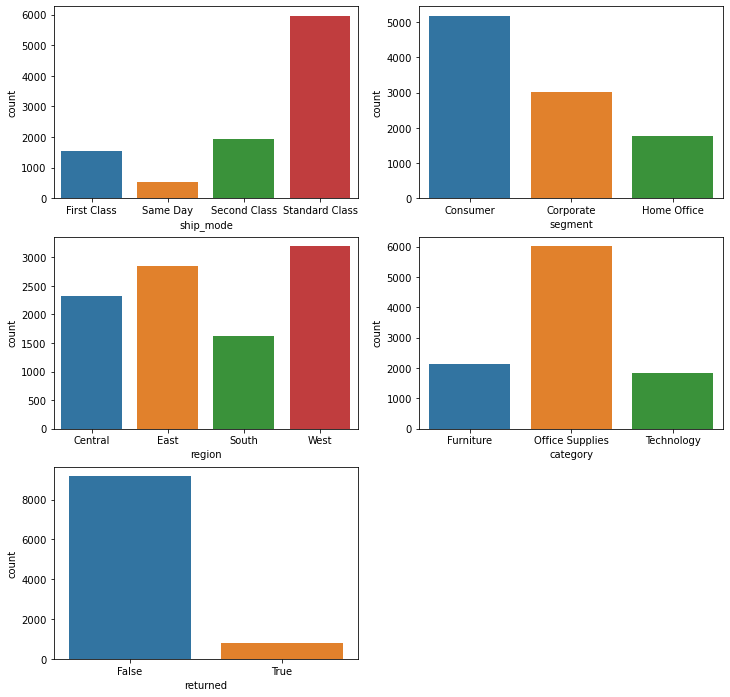

In [45]:
# Plot hists of columns
# set figure
cats = df.select_dtypes('category').columns
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

ax[2][1].set_visible(False)
sns.countplot(x = cats[0], data = df, ax = ax[0, 0])
sns.countplot(x = cats[1], data = df, ax = ax[0, 1])
sns.countplot(x = cats[2], data = df, ax = ax[1, 0])
sns.countplot(x = cats[3], data = df, ax = ax[1, 1])
sns.countplot(x = 'returned', data = df, ax = ax[2, 0])

#### Numerical data

<AxesSubplot:xlabel='profit'>

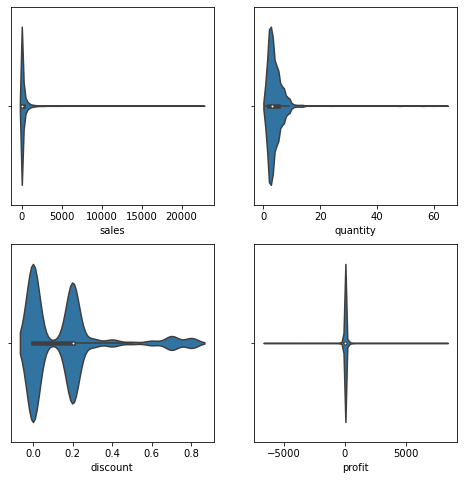

In [46]:
nums = df.select_dtypes(include = ['int', 'float']).columns

# Plot box plot
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

sns.violinplot(x = nums[0], data = df, ax = ax[0, 0])
sns.violinplot(x = nums[1], data = df, ax = ax[0, 1])
sns.violinplot(x = nums[2], data = df, ax = ax[1, 0])
sns.violinplot(x = nums[3], data = df, ax = ax[1, 1])

#### Datetime data
For the datetime data, we'll check the distribution per month and per year. This will be done for the following columns:
- order_date
- shipdate

In [48]:
# Create the columns for orders per month and per year
df['month_order'] = df.order_date.dt.month
df['year_order'] = df.order_date.dt.year

# Set the dtype to category
df['month_order'] = df.month_order.astype('category')
df['year_order'] = df.year_order.astype('category')

# Create the columns for shipping per month and per year
df['month_shipping'] = df.ship_date.dt.month
df['year_shipping'] = df.ship_date.dt.year

# Set the dtype to category
# Create the columns for shipping per month and per year
df['month_shipping'] = df.month_shipping.astype('category')
df['year_shipping'] = df.year_shipping.astype('category')

<AxesSubplot:xlabel='year_shipping', ylabel='count'>

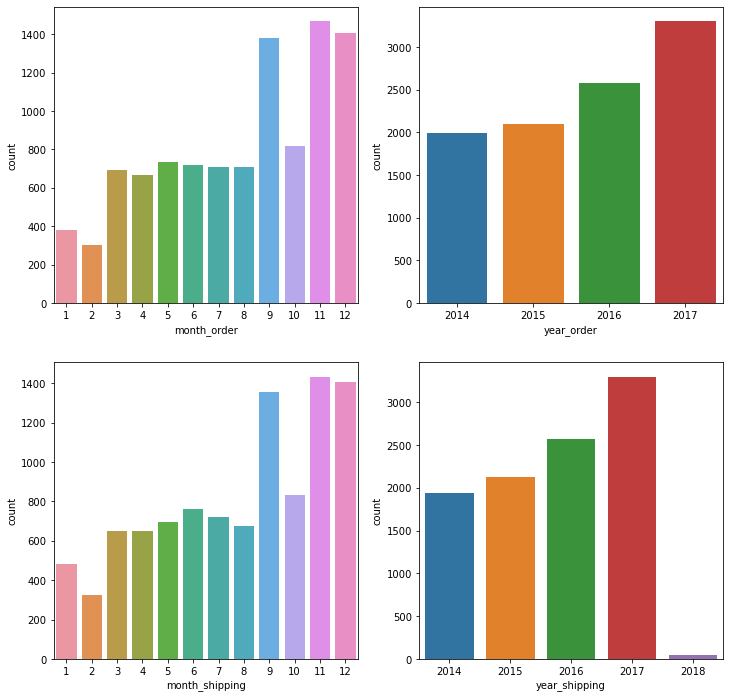

In [49]:
# Plot bar plots using subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

sns.countplot(x = 'month_order', data = df, ax = ax[0, 0])
sns.countplot(x = 'year_order', data = df, ax = ax[0, 1])
sns.countplot(x = 'month_shipping', data = df, ax = ax[1, 0])
sns.countplot(x = 'year_shipping', data = df, ax = ax[1, 1])

## Correlation matrix
In this chapter, a correlation matrix will be shown. Conclusions will also be drawn from the matrix.

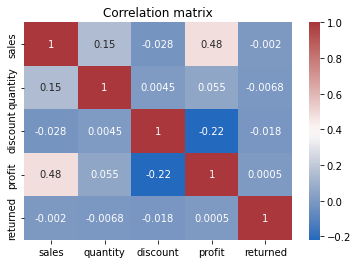

In [50]:
# Create correlation matrix
cor = df.corr()

# Display the correlation matrix
sns.heatmap(cor, annot=True, cmap = 'vlag')
plt.title("Correlation matrix")
plt.show()

### Conclusions
Most correlations found are quite logical. E.g. discount has a small negative correlation with sales. And Sales has a correlation of 0.48 to profit. What we also see is that Discount has correlation of -0.22 with profit. This could indicate that the discounts of the product did not lead an increase in profit. This still needs some in depth analysis to confirm. Lastly, we see that the returned feature has barely an correlation with the other features.
Other correlated features:
- Sales and discount
- Sales and quantity
- Quantity and discount
- Quantity and profit

## (Un)usual patterns
In this section, some plots will be created to detect possible patterns. The plots will be as follows:
- Returned items per month
- Returned items per category
- Profit per category
- Discounts per month vs profits per month

### Returned items per month

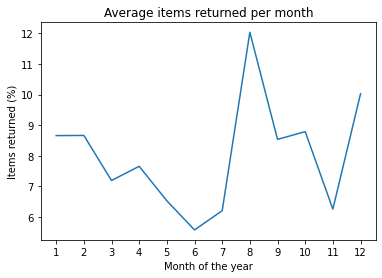

In [51]:
# Get the data ready
months = np.array(df.groupby('month_order').returned.mean() * 100)
xticks = [x for x in range(12)]
label = [x + 1 for x in range(12)]

# Plot the graph
plt.plot(months)
plt.xlabel("Month of the year")
plt.ylabel("Items returned (%)")
plt.title("Average items returned per month")
plt.xticks(ticks = xticks, labels = label)
plt.show()

#### Findings
On the month of august (8) and december (12) are the highest average items returned. The december case is probably because of the holidays that occur in that month. For august there doesn't seem to be a reason at first glamse.

### Returned items per category


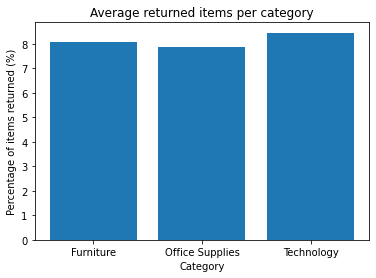

In [52]:
# Get the data ready
cats = pd.DataFrame(df.groupby('category').returned.mean() * 100)
cats.reset_index(inplace = True)

# Create the plot
plt.bar(cats.category, cats.returned)
plt.xlabel("Category")
plt.ylabel("Percentage of items returned (%)")
plt.title("Average returned items per category")
plt.show()

#### Findings
All categories have around the same percentage of returned items

### Profit per category


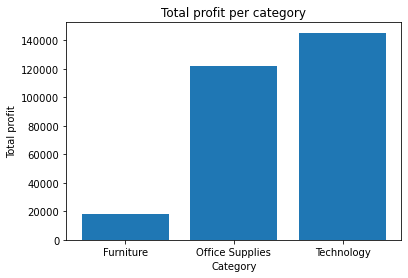

In [53]:
# Get the data ready
profits = pd.DataFrame(df.groupby('category').profit.sum())
profits.reset_index(inplace = True)

# Create the plot
plt.bar(profits.category, profits.profit)
plt.xlabel("Category")
plt.ylabel("Total profit")
plt.title("Total profit per category")
plt.show()

#### Findings
Technology products have the most profit. Shortly after, there comes Office Supplies. And far below that, the furniture products produce the least profit.

### Discounts per month vs profits per month

C:\Users\arjo\AppData\Local\Temp/ipykernel_22980/1378861308.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(label)
C:\Users\arjo\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:507: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


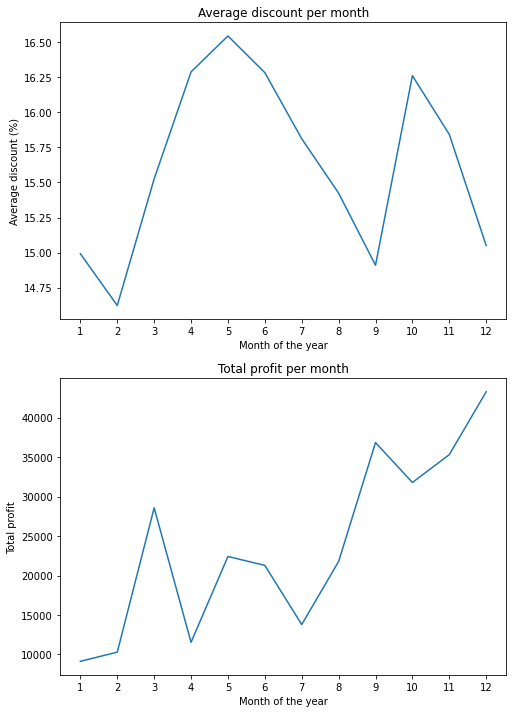

In [54]:
# Set the discount per month
dis_per_month = pd.DataFrame(df.groupby('month_order').discount.mean())

# Set the total profit per month
profit_per_month = pd.DataFrame(df.groupby('month_order').profit.sum())

# Set the subplots
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(8, 12))

# Create the discount in percentages
discount = [x * 100 for x in dis_per_month.discount]

# Set xticks with corresponding label
xticks = [x for x in range(12)]
label = [x + 1 for x in range(12)]

# Plot the first subplot
ax0.plot(discount)
ax0.set_xlabel("Month of the year")
ax0.set_xticklabels(label)
ax0.set_xticks(ticks = xticks)
ax0.set_ylabel("Average discount (%)")
ax0.set_title("Average discount per month")

# Plot the second subplot
ax1.plot(profit_per_month)
ax1.set_xlabel("Month of the year")
ax1.set_ylabel("Total profit")
ax1.set_title("Total profit per month")
ax1.set_xticks(xticks)
ax1.set_xticklabels(label)
plt.show()

#### Findings
It seems that after a high profit has been made, there's some room for increasing the dicount. After the profits fall, the discounts fall shortly after.